<a href="https://colab.research.google.com/github/DavidSenseman/BIO5853/blob/master/Lesson_03_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---------------------------
**COPYRIGHT NOTICE:** This Jupyterlab Notebook is a Derivative work of [Jeff Heaton](https://github.com/jeffheaton) licensed under the Apache License, Version 2.0 (the "License"); You may not use this file except in compliance with the License. You may obtain a copy of the License at

> [http://www.apache.org/licenses/LICENSE-2.0](http://www.apache.org/licenses/LICENSE-2.0)

Unless required by applicable law or agreed to in writing, software distributed under the License is distributed on an "AS IS" BASIS, WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied. See the License for the specific language governing permissions and limitations under the License.

------------------------

# **BIO 5853: Biostatistics**

##### **Module 3: Inference**

* Instructor: [David Senseman](mailto:David.Senseman@utsa.edu), [Department of Integrative Biology](https://sciences.utsa.edu/integrative-biology/), [UTSA](https://www.utsa.edu/)


### Module 3 Material

* Part 3.1: Confidence Intervals
* Part 3.2: Hypothesis Testing
* Part 3.3: Comparison of Two Means
* **Part 3.4: Analysis of Variance (ANOVA)**
* Part 3.5: Nonparametric Methods
* Part 3.6: Inference on Proportions
* Part 3.7: Contingency Tables
* Part 3.8: Correlation
* Part 3.9: Simple Linear Regression
* Part 3.10: Multiple Linear Regression
* Part 3.11: Logistic Regression
* Part 3.12: Survival Analysis

## Google CoLab Instructions

The following code ensures that Google CoLab is running the correct version of TensorFlow.
  Running the following code will map your GDrive to ```/content/drive```.

In [1]:
# YOU MUST RUN THIS CELL FIRST
try:
    from google.colab import drive
    drive.mount('/content/drive', force_remount=True)
    from google.colab import auth
    auth.authenticate_user()
    COLAB = True
    print("Note: using Google CoLab")
    %tensorflow_version 2.x
    import requests
    gcloud_token = !gcloud auth print-access-token
    gcloud_tokeninfo = requests.get('https://www.googleapis.com/oauth2/v3/tokeninfo?access_token=' + gcloud_token[0]).json()
    print(gcloud_tokeninfo['email'])
except:
    print("Note: not using Google CoLab")
    COLAB = False

Note: not using Google CoLab


# **Part 3.4: Analysis of Variance (ANOVA)**

**_Analysis of Variance (ANOVA)_** is a statistical technique used to determine if there are significant differences between the means of three or more groups. It essentially helps to test hypotheses about whether the means of different groups are equal or not.

#### **Key Concepts of ANOVA:**
1. **Hypothesis Testing:** ANOVA tests the null hypothesis that all group means are equal against the alternative hypothesis that at least one group mean is different.
2. **_F_ -Statistic:** The test uses the _F_ -statistic, which is a ratio of the variance between the groups to the variance within the groups.
3. **Types of ANOVA:**
- * **One-Way ANOVA:** Tests the effect of a single factor on a response variable.
- * **Two-Way ANOVA:** Tests the effect of two factors and their interaction on a response variable.

#### **Importance in Biostatistics:**

1. **Comparing Multiple Groups:** ANOVA is crucial in biostatistics for comparing the means of multiple groups simultaneously, which is common in medical and biological research.
2. **Eliminating Confounding Factors:** It helps to control for confounding variables, ensuring that the observed differences are due to the factors being studied.
3. **Validity of Results:** By using ANOVA, researchers can obtain more reliable and valid results, reducing bias in their studies.
4. **Efficiency:** Instead of performing multiple t-tests, which increases the risk of Type I error, ANOVA provides a more efficient and accurate way to compare multiple groups.

## **One-Way Analysis of Variance**

When the groups for which the means are being compared represent the classes defined by a single  categorical variable, we use one-way analysis of variance.  

### **The Problem**  

Suppose you want to examine data from a study that investigated the effects of carbon monoxide exposure on patients with coronary artery disease by subjecting them to a series of exercise tests. The males involved in this study were recruited from three different medical centers — the Johns Hopkins University School of Medicine,  the Rancho Los Amigos Medical Center, and the St. Louis University School of Medicine. 

Before  combining the subjects into one large group to conduct the analysis, we should have first examined  some baseline characteristics to ensure that the individuals from different centers were in fact comparable. One characteristic that we might wish to consider is pulmonary function at the start of the study. If the subjects from one medical center begin with measures of forced expiratory volume in 1 second (fev1) that are much larger – or much smaller – than those from the other centers, the results of the analysis may be affected. Therefore, given that the populations of patients in the three centers have mean baseline fev1 measurements $\mu_1$, $\mu_2$, and $\mu_3$ respectively, we would like to test the null hypothesis thatthe population means are identical. This may be expressed as  

$$ H_0: \mu_1 = \mu_2 = \mu_3 $$

Note that the populations being compared are defined by the three classes of the categorical variable  medical center. The alternative hypothesis is that at least one of the population means differs from one of the others.  In general, we are interested in comparing the means of k different populations. Suppose that the _k_ populations are independent and normally distributed. 

We begin by drawing a random sample  of size $n_1$ from the normal population with mean $\mu_1$ and standard deviation $\sigma_1$. The mean of this sample is denoted by $\bar{x}_1$ and its standard deviation by $s_1$. Similarly, we select a random sample of size $n_2$ from the normal population with mean $\mu_2$ and standard deviation $\sigma_2$ σ2, and so on for the remaining populations. The numbers of observations in each sample need not be the same.  

![____](https://biologicslab.co/BIO5853/images/module_03/lesson_03_4_image01.png)

Pagano, Marcello; Gauvreau, Kimberlee; Mattie, Heather. Principles of Biostatistics (p. 280). CRC Press. Kindle Edition. 

## **Datasets for this Lesson**

In this lesson we will be using 3 datasets that we need to read from the course file server. The first dataset contains the fev1 values that are used in the "**The Problem**" outlined above. Two additional datasets will also be used in this lesson. 

### Example 1: Read Datafile

The code in the cell below uses the Pandas function `pd.read_csv(filename)` to read the data file `centers_fev1.csv` stored on the course HTTPS server https://biologicslab.co. As the file is read, it is stored in a Pandas DataFrame called `fvDF`. 

This file contains the data for **The Problem** decribed in the preceeding text cell.

In [2]:
# Example 1: Read datafile

import pandas as pd

# Read datafile and create DataFrame 
fvDF = pd.read_csv(
    "https://biologicslab.co/BIO5853/data/centers_fev1.csv",
    index_col=0,
    sep=',',
    na_values=['NA','?'])

# Set max rows and max columns
pd.set_option('display.max_rows', 6)
pd.set_option('display.max_columns', 4) 

# Display DataFrame
display(fvDF)

,center,fev1
1,1,3.23
2,1,3.47
3,1,1.86
...,...,...
58,3,2.43
59,3,3.20
60,3,3.53


If your code is correct, you should see the following output:

![____](https://biologicslab.co/BIO5853/images/module_03/lesson_03_4_image11.png)

Our new DataFrame `fvDF` has total of 60 records of fev1 values in the column **fev1**. This is the to the total volume of air that is forcibly inhaled or exhaled from the lungs within one minute. This measurement is crucial in respiratory physiology as it helps assess lung function and ventilation efficiency.

![____](https://biologicslab.co/BIO5853/images/module_03/LungVolumes.png)

### **Exercise 1A: Read Datafile**

In the cell below, use the Pandas function `pd.read_csv(filename)` to read a data file called `Cushings.csv` stored on the course HTTPS server https://biologicslab.co. As the file is read, store in a Pandas DataFrame called `cushDF`.

#### **Data Description**

Cushing’s syndrome is a hormone disorder associated with high level of cortisol secreted by the adrenal gland. The Cushings data set includes 27 observations (n = 27). For each individual in the sample, the urinary excretion rates of two steroid metabolites are recorded. These are urinary excretion rate (mg/24 hr) of Tetrahydrocortisone (`TCort`) and urinary excretion rate (mg/24 hr) of Pregnanetriol (`PregN`). The Type variable in the data set shows the underlying type of syndrome, which can be one of four categories: adenoma (a), bilateral hyperplasia (b), carcinoma (c), and unknown (u).

_Code Hints:_

1. You will need to comment out the following line:
~~~text
#    index_col=0,
~~~
Except for this change, you can just reuse the code in Example 1 'as is', after you change the name of the datafile and the DataFrame.


In [3]:
# Insert your code for Exercise 1 here

import pandas as pd

# Read data file
cushDF = pd.read_csv("https://biologicslab.co/STA1403/data/Cushings.csv",
#                   index_col=0,
                    sep=',',
                    na_values=['NA','?'])

# Set max rows and max columns
pd.set_option('display.max_rows', 6)
pd.set_option('display.max_columns', 4) 

# Display DataFrame
display(cushDF)

,TCort,PregN,Type
0,3.1,11.7,a
1,3.0,1.3,a
2,1.9,0.1,a
...,...,...,...
24,2.6,0.1,u
25,30.0,0.1,u
26,20.5,0.8,u


If your code is correct, you should see the following output:

![____](https://biologicslab.co/BIO5853/images/module_03/lesson_03_4_image12.png)

### **Exercise 1B: Read Datafile**

In the cell below, use the Pandas function `pd.read_csv(filename)` to read a data file called `genotype.csv` stored on the course HTTPS server https://biologicslab.co. As the file is read, store in a Pandas DataFrame called `genoDF`.

#### **Data Description**

Data from a foster feeding experiment with rat mothers and litters of four different genotypes: A, B, I and J. Rat litters were separated from their natural mothers at birth and given to foster mothers to rear.

The data frame has the following components:
* **Litter:** genotype of the litter.
* **Mother:** genotype of the foster mother.
* **Wt:** Litter average weight gain of the litter, in grams at age 28 days. (The source states that the
within-litter variability is negligible.)

_Code Hints:_

1. As in **Exercise 1A**, you will need to comment out the following line:
~~~text
#    index_col=0,
~~~
Except for this change, you can just reuse the code in Example 1 'as is', after you change the name of the datafile and the DataFrame.


In [4]:
# Insert your code for Exercise 1B here

import pandas as pd

# Read data file
genoDF = pd.read_csv("https://biologicslab.co/STA1403/data/genotype.csv",
#                   index_col=0,
                    sep=',',
                    na_values=['NA','?'])

# Set max rows and max columns
pd.set_option('display.max_rows', 6)
pd.set_option('display.max_columns', 4) 

# Display DataFrame
display(genoDF)

,Litter,Mother,Wt
0,A,A,61.5
1,A,A,68.2
2,A,A,64.0
...,...,...,...
58,J,J,53.0
59,J,J,42.0
60,J,J,54.0


If your code is correct, you should see the following output:

![____](https://biologicslab.co/BIO5853/images/module_03/lesson_03_4_image17.png)

### Example 2A: Store DataFrame Values in Dictionary

While it is ususally preferrable to peform statistical procedures (e.g. ANOVA) on data stored in a Pandas DataFrame, there are exceptions. Normally, each row in a DataFrame contains the data for an item such as an experimental animal, a test subject or a patient in a medical study. The different "pieces" of data belonging to that subject is located in one of the DataFrame columns. If you look at the output from Example 1, you see this:

![____](https://biologicslab.co/BIO5853/images/module_03/lesson_03_4_image11.png)

The column called `center` contains the numbers `1`, `2` and `3` which stand for the names of the three medical centers where the measurements were performed: `Johns Hopkins`, `Rancho Los Amigos` and `St. Louis`, respectively. One way to work with this kind of data, as illustrated in this example, is to create a Python **_dictionary_** called `fv1_dict` and store the fev1 measurements from each medical center separately as a Numpy array. 

_Code Description:_

Since all of the fev1 measurements are in a single column called `fev1` we first need to specifically extract data from the column that belongs to a particular medical center. To do this we use something called a **_boolean mask_**. A boolean mask is a binary array or a boolean-valued array (containing `True` or `False` values) used to filter or select specific elements from another array based on certain conditions. 
Elements in the target array are selected if the corresponding element in the boolean mask is `True`.

This is the code chunk that creates the boolean masks:
~~~text
# Generate masks
center = [1, 2, 3]
masks = {f'center_{t}': (fvDF.center == t) for t in center}
~~~

This code created 3 boolean masks called `center_1`, `center_2` and `center_3`. The mask `center_1` has boolean value `True` whenever the number in the column `center` was the number `1`, otherwise the boolean value is `False`.

Once the 3 masks have been created, the next step is to use them to copy the data in the DataFrame `fvDF` from each center into a dictionary called `fev1_dict` using this code chunk:

~~~text
# Fill dictionary with values from the DataFrame
for mask in masks:
    fev1_dict[mask] = np.array(fvDF.fev1[globals()[mask]])
~~~

In a Python dictionary, there are `key:value` pairs. Right after it was created, the `keys` in the dictionary `fev1_dict` were `center_1`, `center_2` and `center_3`. While we know that `center_1` is `Johns Hopkins`, for example, it would be nice to change the key name to the name of the medical center. That was done with in the following code chunk:

~~~text
# Create function to rename dict keys
def rename_key(dictionary, old_key, new_key):
    if old_key in dictionary:
        dictionary[new_key] = dictionary.pop(old_key)

# Use function to rename keys
rename_key(fev1_dict, 'center_1', 'Johns Hopkins')
rename_key(fev1_dict, 'center_2', 'Rancho Los Amigos')
rename_key(fev1_dict, 'center_3', 'St. Louis')
~~~

In the last part of the code cell, a `for loop` is used to print out all the `key:value` pairs in `fev1_dict`.

In [5]:
# Example 2A: Store DataFrame Values in Dictionary

import numpy as np

# Generate masks
center = [1, 2, 3]
masks = {f'center_{t}': (fvDF.center == t) for t in center}

# If you need to access the masks
center_1 = masks['center_1']
center_2 = masks['center_2']
center_3 = masks['center_3']

# Initialize dictionary
fev1_dict = {}

# Fill dictionary with values from the DataFrame
for mask in masks:
    fev1_dict[mask] = np.array(fvDF.fev1[globals()[mask]])

# Create function to rename dict keys
def rename_key(dictionary, old_key, new_key):
    if old_key in dictionary:
        dictionary[new_key] = dictionary.pop(old_key)

# Use function to rename keys
rename_key(fev1_dict, 'center_1', 'Johns Hopkins')
rename_key(fev1_dict, 'center_2', 'Rancho Los Amigos')
rename_key(fev1_dict, 'center_3', 'St. Louis')

# Print results
print("----Key:Value pairs in fev1_dict ----------")

# Iterating over key-value pairs
for key, value in fev1_dict.items():
    print(f"{key}: {value}")


----Key:Value pairs in fev1_dict ----------
Johns Hopkins: [3.23000002 3.47000003 1.86000001 2.47000003 3.00999999 1.69000006
 2.0999999  2.80999994 3.27999997 3.3599999  2.6099999  2.91000009
 1.98000002 2.56999993 2.07999992 2.47000003 2.47000003 2.74000001
 2.88000011 2.63000011 2.52999997]
Rancho Los Amigos: [3.22000003 2.88000011 1.71000004 2.8900001  3.76999998 3.28999996
 3.3900001  3.8599999  2.6400001  2.71000004 2.71000004 3.41000009
 2.86999989 2.6099999  3.3900001  3.17000008]
St. Louis: [2.78999996 3.22000003 2.25       2.98000002 2.47000003 2.76999998
 2.95000005 3.55999994 2.88000011 2.63000011 3.38000011 3.06999993
 2.80999994 3.17000008 2.23000002 2.19000006 4.05999994 1.98000002
 2.80999994 2.8499999  2.43000007 3.20000005 3.52999997]


If the code is correct, you should see the following output:

~~~text
----Key:Value pairs in fev1_dict ----------
Johns Hopkins: [3.23000002 3.47000003 1.86000001 2.47000003 3.00999999 1.69000006
 2.0999999  2.80999994 3.27999997 3.3599999  2.6099999  2.91000009
 1.98000002 2.56999993 2.07999992 2.47000003 2.47000003 2.74000001
 2.88000011 2.63000011 2.52999997]
Rancho Los Amigos: [3.22000003 2.88000011 1.71000004 2.8900001  3.76999998 3.28999996
 3.3900001  3.8599999  2.6400001  2.71000004 2.71000004 3.41000009
 2.86999989 2.6099999  3.3900001  3.17000008]
St. Louis: [2.78999996 3.22000003 2.25       2.98000002 2.47000003 2.76999998
 2.95000005 3.55999994 2.88000011 2.63000011 3.38000011 3.06999993
 2.80999994 3.17000008 2.23000002 2.19000006 4.05999994 1.98000002
 2.80999994 2.8499999  2.43000007 3.20000005 3.52999997]
~~~

You should note that the number of `fev1` measurements are **_not_** the same between the 3 medical centers, with `St. Louis` having the largest number, and `Rancho Los Amigos` having the smallest number. In a typical DataFrame, each column as the same number of values. This data could be "forced" into a DataFrame, but it would be rather ugly. This is one of the main reasons that the `fev1` data is better stored in a Python dictionary instead of a DataFrame.

### Example 2B: Store DataFrame Values in Dictionary

The code in the cell below shows another example of how to store DataFrame values in a Python dictionary. Specifically, this example shows how to extract the data from the `TCort` column in the `cushDF` DataFrame and place this data in a new Python dictionary called `TCort_dict`. As in the preceding example, the code replaces the `key` names with the actual tumor type (e.g.`adenoma` instead of `type_a`).

In [6]:
# Example 2B: Store DataFrame Values in Dictionary

import numpy as np

# Generate masks
types = ['a', 'b', 'c', 'u']
masks = {f'type_{t}': (cushDF.Type == t) for t in types}

# If you need to access the masks
type_a = masks['type_a']
type_b = masks['type_b']
type_c = masks['type_c']
type_u = masks['type_u']

# Initialize an empty array
TCort_dict = {}

# Fill empty array with TCort values from the DataFrame
for mask in masks:
    TCort_dict[mask] = np.array(cushDF.TCort[globals()[mask]])


# Create function to rename dict keys
def rename_key(dictionary, old_key, new_key):
    if old_key in dictionary:
        dictionary[new_key] = dictionary.pop(old_key)

# Use function to rename keys
rename_key(TCort_dict, 'type_a', 'adenoma')
rename_key(TCort_dict, 'type_b', 'bilateral hyperplasia')
rename_key(TCort_dict, 'type_c', 'carcinoma')
rename_key(TCort_dict, 'type_u', 'unknown')

# Print results
print("----Key:Value pairs in TCort_dict ----------")
# Iterating over key-value pairs
for key, value in TCort_dict.items():
    print(f"{key}: {value}")


----Key:Value pairs in TCort_dict ----------
adenoma: [3.1 3.  1.9 3.8 4.1 1.9]
bilateral hyperplasia: [ 8.3  3.8  3.9  7.8  9.1 15.4  7.7  6.5  5.7 13.6]
carcinoma: [10.2  9.2  9.6 53.8 15.8]
unknown: [ 5.1 12.9 13.   2.6 30.  20.5]


If the code is correct, you should see the following output:
~~~text
----Key:Value pairs in TCort_dict ----------
adenoma: [3.1 3.  1.9 3.8 4.1 1.9]
bilateral hyperplasia: [ 8.3  3.8  3.9  7.8  9.1 15.4  7.7  6.5  5.7 13.6]
carcinoma: [10.2  9.2  9.6 53.8 15.8]
unknown: [ 5.1 12.9 13.   2.6 30.  20.5]
~~~

### **Exercise 2: Store DataFrame Values in Dictionary**

In the cell below, write the Python code to extract the values for Pregnanetriol (`PregN`) from the DataFrame `cushDF` and store them in a new dictionary called `PregN_dict`. You can basically reuse the code in Example 2B after making the appropiate changes in the variable names. 

In [7]:
# Insert your code for Exercise 2 here

import numpy as np

# Generate masks
types = ['a', 'b', 'c', 'u']
masks = {f'type_{t}': (cushDF.Type == t) for t in types}

# If you need to access the masks
type_a = masks['type_a']
type_b = masks['type_b']
type_c = masks['type_c']
type_u = masks['type_u']

# Initialize dictionary
PregN_dict = {}

# Fill empty array with PregN values from the DataFrame
for mask in masks:
    PregN_dict[mask] = np.array(cushDF.PregN[globals()[mask]])

# Create function to rename dict keys
def rename_key(dictionary, old_key, new_key):
    if old_key in dictionary:
        dictionary[new_key] = dictionary.pop(old_key)

# Use function to rename keys
rename_key(PregN_dict, 'type_a', 'adenoma')
rename_key(PregN_dict, 'type_b', 'bilateral hyperplasia')
rename_key(PregN_dict, 'type_c', 'carcinoma')
rename_key(PregN_dict, 'type_u', 'unknown')

# Print results
print("----Key:Value pairs in PregN_dict ----------")
# Iterating over key-value pairs
for key, value in PregN_dict.items():
    print(f"{key}: {value}")



----Key:Value pairs in PregN_dict ----------
adenoma: [11.7   1.3   0.1   0.04  1.1   0.4 ]
bilateral hyperplasia: [1.  0.2 0.6 1.2 0.6 3.6 1.6 0.4 0.4 1.6]
carcinoma: [6.4 7.9 3.1 2.5 7.6]
unknown: [0.4 5.  0.8 0.1 0.1 0.8]


If your code is correct, you should see the following output:

~~~text
----Key:Value pairs in PregN_dict ----------
adenoma: [11.7   1.3   0.1   0.04  1.1   0.4 ]
bilateral hyperplasia: [1.  0.2 0.6 1.2 0.6 3.6 1.6 0.4 0.4 1.6]
carcinoma: [6.4 7.9 3.1 2.5 7.6]
unknown: [0.4 5.  0.8 0.1 0.1 0.8]
~~~

### Example 3A: Print Summary Statistics

The code in the cell below illustrates how to print out summary statistics for the forced ventilation (_fev_) data at each of the 3 medical centers in the DataFrame `fvDF`

_Code Description:_

The code uses a custom function called `compute_stats(data)` to compute the statistics. The advantage of this function is that it accepts a Python **_dictionary_** containing multiple numpy arrays as an argument. Here is the code for this custom function:

~~~text
# Function to compute summary stats
def compute_stats(data):
    stats = {}
    for key, array in data.items():
        mean = np.mean(array)
        std_dev = np.std(array)
        n = len(array)
        min = np.min(array)
        max = np.max(array)
        stats[key] = {'count': n, 'mean': mean, 'std_dev': std_dev, 'min': min, 'max': max}
    return stats
~~~

The only variable that needs to be changed is the name of the dictionary in the following code chunk:
~~~text
# Compute statistics
stats = compute_stats(fev1_dict)
~~~

The information in the variable `stats` is converted into a DataFrame with the following code:

~~~text
# Create a DataFrame for better formatting
stats_df = pd.DataFrame(stats).T
~~~

The dot "T" at the end of the line of code means to **_Transpose_** the data in the dictionary when creating the DataFrame. What this means is that the dictionary _keys_ (e.g. `Johns Hopkins`) become the row names, and the _values_ associated with each key becomes the data in that row. 

In [8]:
# Example 3A: Print Summary Statistics

import numpy as np

# Function to compute summary stats
def compute_stats(data):
    stats = {}
    for key, array in data.items():
        mean = np.mean(array)
        std_dev = np.std(array)
        n = len(array)
        min = np.min(array)
        max = np.max(array)
        stats[key] = {'count': n, 'mean': mean, 'std_dev': std_dev, 'min': min, 'max': max}
    return stats

# Compute statistics
stats = compute_stats(fev1_dict)

# Create a DataFrame for better formatting
stats_df = pd.DataFrame(stats).T

# Round the DataFrame to 2 decimal places
stats_df = stats_df.round(2)

# Set display options
pd.set_option('display.max_rows', 8)
pd.set_option('display.max_columns', 8)

# Print header
print("----Summary Statistics for fev1 data ---------------------")

# Print the DataFrame
print(stats_df)

----Summary Statistics for fev1 data ---------------------
                   count  mean  std_dev   min   max
Johns Hopkins       21.0  2.63     0.48  1.69  3.47
Rancho Los Amigos   16.0  3.03     0.51  1.71  3.86
St. Louis           23.0  2.88     0.49  1.98  4.06


If the code is correct, you should see the following output:

~~~text
----Summary Statistics for fev1 data ---------------------
                   count  mean  std_dev   min   max
Johns Hopkins       21.0  2.63     0.48  1.69  3.47
Rancho Los Amigos   16.0  3.03     0.51  1.71  3.86
St. Louis           23.0  2.88     0.49  1.98  4.06
~~~

Except for some rounding errors, these are the same statistics for each medical center as shown at the bottom of **TABLE 12.1** on page 281.

~~~text
  Johns Hopkins       Rancho Los Amigos        St. Louis
    n1 = 21               n2 = 16               n3 = 23  
x1 = 2.63 liters      x2 = 3.03 liters     x3 = 2.88 liters  
s1 = 0.496 liters     s2 = 0.523 liters    s3 = 0.498 liters 
~~~

### **Exercise 3A: Print Summary Statistics**

In the cell below, write the Python code to print out summary statistics for TCort data in the `TCort_dict`.

In [9]:
# Insert your code for Exercise 3A here

import numpy as np

# Function to compute summary stats
def compute_stats(data):
    stats = {}
    for key, array in data.items():
        mean = np.mean(array)
        std_dev = np.std(array)
        n = len(array)
        min = np.min(array)
        max = np.max(array)
        stats[key] = {'count': n, 'mean': mean, 'std_dev': std_dev, 'min': min, 'max': max}
    return stats

# Compute statistics
stats = compute_stats(TCort_dict)

# Create a DataFrame for better formatting
stats_df = pd.DataFrame(stats).T

# Round the DataFrame to 2 decimal places
stats_df = stats_df.round(2)

# Set display
pd.set_option('display.max_columns', 8)

# Print header
print("----Summary Statistics for TCort ---------------------------")

# Print the DataFrame
print(stats_df)

----Summary Statistics for TCort ---------------------------
                       count   mean  std_dev  min   max
adenoma                  6.0   2.97     0.84  1.9   4.1
bilateral hyperplasia   10.0   8.18     3.59  3.8  15.4
carcinoma                5.0  19.72    17.21  9.2  53.8
unknown                  6.0  14.02     9.22  2.6  30.0


If your code if correct, you should see the following table:

~~~text
----Summary Statistics for TCort ---------------------------
                       count   mean  std_dev  min   max
adenoma                  6.0   2.97     0.84  1.9   4.1
bilateral hyperplasia   10.0   8.18     3.59  3.8  15.4
carcinoma                5.0  19.72    17.21  9.2  53.8
unknown                  6.0  14.02     9.22  2.6  30.0
~~~

### **Exercise 3B: Print Summary Statistics**

In the cell below, write the Python code to print out summary statistics for PregN data in the `PregN_dict`.

In [10]:
# Insert your code for Exercise 3B here

import numpy as np

# Function to compute summary stats
def compute_stats(data):
    stats = {}
    for key, array in data.items():
        mean = np.mean(array)
        std_dev = np.std(array)
        n = len(array)
        min = np.min(array)
        max = np.max(array)
        stats[key] = {'count': n, 'mean': mean, 'std_dev': std_dev, 'min': min, 'max': max}
    return stats

# Compute statistics
stats = compute_stats(PregN_dict)

# Create a DataFrame for better formatting
stats_df = pd.DataFrame(stats).T

# Round the DataFrame to 2 decimal places
stats_df = stats_df.round(2)

# Print header
print("----Summary Statistics for NPreg ----------------------------")

# Print the DataFrame
print(stats_df)

----Summary Statistics for NPreg ----------------------------
                       count  mean  std_dev   min   max
adenoma                  6.0  2.44     4.17  0.04  11.7
bilateral hyperplasia   10.0  1.12     0.95  0.20   3.6
carcinoma                5.0  5.50     2.27  2.50   7.9
unknown                  6.0  1.20     1.72  0.10   5.0


If your code if correct, you should see the following table:

~~~text
----Summary Statistics for NPreg ----------------------------
                       count  mean  std_dev   min   max
adenoma                  6.0  2.44     4.17  0.04  11.7
bilateral hyperplasia   10.0  1.12     0.95  0.20   3.6
carcinoma                5.0  5.50     2.27  2.50   7.9
unknown                  6.0  1.20     1.72  0.10   5.0
~~~

### Example 4: Plot F-Distribution

The code in the cell below illustrates how to recreate the _F_ distribution plot (**Figure 12.2**) on page 284 in your textbook. The code uses the `scipy.stats` function `f.pdf()` to generate the `y` values for a probability density function (pdf) using the following code chunk:
~~~text
# Calculate the F distribution probability density function (pdf)
y = f.pdf(x, dfn, dfd)
~~~

When plotting the _F_ distribution, you must specify the degrees of freedon for both the numerator and the denominator. In the code below, this is done as shown in the following code chunk:

~~~text
# Define the degrees of freedom
dfn = 4  # degrees of freedom for the numerator
dfd = 2  # degrees of freedom for the denominator
~~~~

Other aspects of the code used for generating this x-y plot have been described in earlier lessons (e.g. Example 5 in Lesson_02_3).

![____](https://biologicslab.co/BIO5853/images/module_03/lesson_03_4_image04.png)

**FIGURE 12.2**  The _F_ distribution with 4 and 2 degrees of freedom

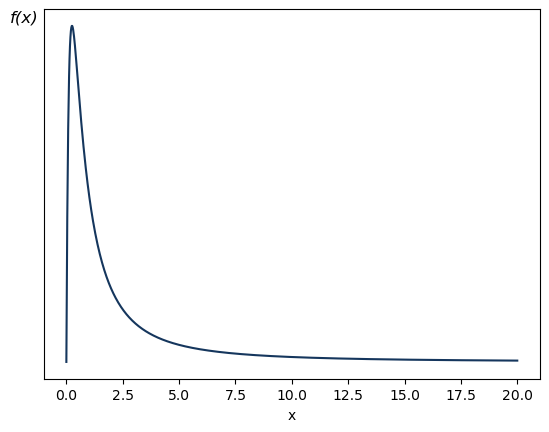

In [11]:
# Example 4: Plot F-distribution

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import f

# Define the degrees of freedom
dfn = 4  # degrees of freedom for the numerator
dfd = 2  # degrees of freedom for the denominator

# Set color
color_1 = '#15365d' # Dark blue

# Generate x values
x = np.linspace(0, 20, 1000)

# Calculate the F distribution probability density function (pdf)
y = f.pdf(x, dfn, dfd)

# Plot the F distribution
plt.plot(x, y, color=color_1)

# Ensure y-axis is not visible
plt.gca().yaxis.set_visible(False)

# Plot label
plt.xlabel('x')

# Plot text
plt.text(-2.5, 0.60, 'f(x)', fontsize=12, style='italic')

# Turn off grid
plt.grid(False)

# Show plot
plt.show()


If the code is correct, you should see the following table.

![____](https://biologicslab.co/BIO5853/images/module_03/lesson_03_4_image05.png)

**FIGURE 12.2**  The _F_ distribution with 4 and 2 degrees of freedom

### **Exercise 4: Plot F-distribution**

In the cell below, write the Python code to generate a plot of the _F_ distribution with 2 degrees of freedom in the numerator and 4 degrees of freedom in the denominator. 

_Code Hints:_

You can reuse the code in Example 4 after changing the degrees of freedom values. You will also have to change the location of the text that prints of the f(x) at the top left:

~~~text
# Plot text
plt.text(-2.5, 1.0, 'f(x)', fontsize=12, style='italic') 
~~~

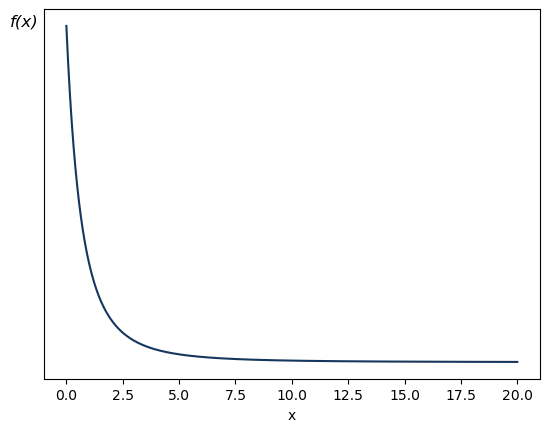

In [12]:
# Insert your code for Exercise 4 here

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import f

# Define the degrees of freedom
dfn = 2  # degrees of freedom for the numerator
dfd = 4  # degrees of freedom for the denominator

# Set color
color_1 = '#15365d' # Dark blue

# Generate x values
x = np.linspace(0, 20, 1000)

# Calculate the F distribution probability density function (pdf)
y = f.pdf(x, dfn, dfd)

# Plot the F distribution
plt.plot(x, y, color=color_1)

# Ensure y-axis is not visible
plt.gca().yaxis.set_visible(False)

# Plot label
plt.xlabel('x')

# Plot text
plt.text(-2.5, 1.0, 'f(x)', fontsize=12, style='italic') 

# Turn off grid
plt.grid(False)

# Show plot
plt.show()


If your code is correct, you should see the following table.

![____](https://biologicslab.co/BIO5853/images/module_03/lesson_03_4_image06.png)

The F distribution with 2 and 4 degrees of freedom

## **Necessary Conditions for ANOVA**

To use ANOVA (Analysis of Variance) effectively, several key assumptions must be met:

* **Normality:** The data for each group should be approximately normally distributed. This can be checked using visual methods like histograms or Q-Q plots, or statistical tests like the Shapiro-Wilk test.
* **Homogeneity of Variances:** The variances among the groups should be equal. This is also known as homoscedasticity. You can test this assumption using Levene’s test or Bartlett’s test.
* **Independence:** The observations should be independent of each other. This means the data collected from one group should not influence the data from another group.

On page 284, your textbook states:

>Referring back to the fev1 data collected for patients from three different medical centers, we  are interested in testing
>
$$ H_0: \mu_1 = \mu_2 = \mu_3,  $$

>the null hypothesis that the mean forced expiratory volumes in 1 second for subjects from each of the three centers are identical. To begin, we verify that the fev1 measurements are approximately normally distributed. Based on the histograms shown in Figure 12.3, this appears to be a reasonable  assumption.


![____](https://biologicslab.co/BIO5853/images/module_03/lesson_03_4_image07.png)

**FIGURE 12.3** Histograms for measurements of forced expiratory volume in 1 second for subjects at three medical centers

### Example 5: Plot Histograms


The code in the cell below shows to recreate **Figure 12.3** using Python. 

_Code Description:_

This is a rather complex group plot with two histograms plotted on top row, and only one plotted in the lower row. Here is the code chunk for making a composite plot with two figures on the top row and two on the bottom row:
~~~text
# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
~~~
Since we only want 3 plots, the "4th" plot at the bottom right will be a dummy plot.

Here is the code chunk that computes the histogram values from the data stored in the `fev1_dict` for one medical center (e.g. "Johns Hopkins") 

~~~text
counts, _ = np.histogram(fev1_dict['Johns Hopkins'], bins=bins)
~~~

This line of Python code uses the `numpy.histogram` function to compute the histogram of the data stored in `fev1_dict['Johns Hopkins']`. Here is what it's doing:

* **fev1_dict['Johns Hopkins']:** This accesses the data associated with the key `'Johns Hopkins'` in the dictionary `fev1_dict`.
* **bins=bins:** This specifies the bin edges or the number of bins to use for the histogram. The variable `bins` is defined near the top of the code cell.
* **np.histogram:** This function computes the histogram of the input data. It returns two values:
- - **counts:** An array of the counts of data points in each bin.
- - **_:** An array of the bin edges (not used in this case, hence the underscore _).

So, the code calculates the frequency distribution of the data in `fev1_dict['Johns Hopkins']` and stores the counts of data points in each bin in the variable counts.

Here is the code chunk that actually plots one bar chart using the "histogram" data:

~~~text
# Plot Johns Hopkins data
counts, _ = np.histogram(fev1_dict['Johns Hopkins'], bins=bins)
axs[0, 0].bar(bins[:-1], counts, width=bin_width, color=color_1)
axs[0, 0].set_title('Johns Hopkins',fontsize=18)
axs[0,0].tick_params(axis='x', labelsize=18)
axs[0,0].tick_params(axis='y', labelsize=18)
~~~

Note that `axs[0,0]` represents the _top left_ chart, `axs[0,1]` represents the _top right_ chart,  `axs[1,0]` represents the _bottom left_ chart, and `axs[1,1]` represents the _bottom right_ chart.

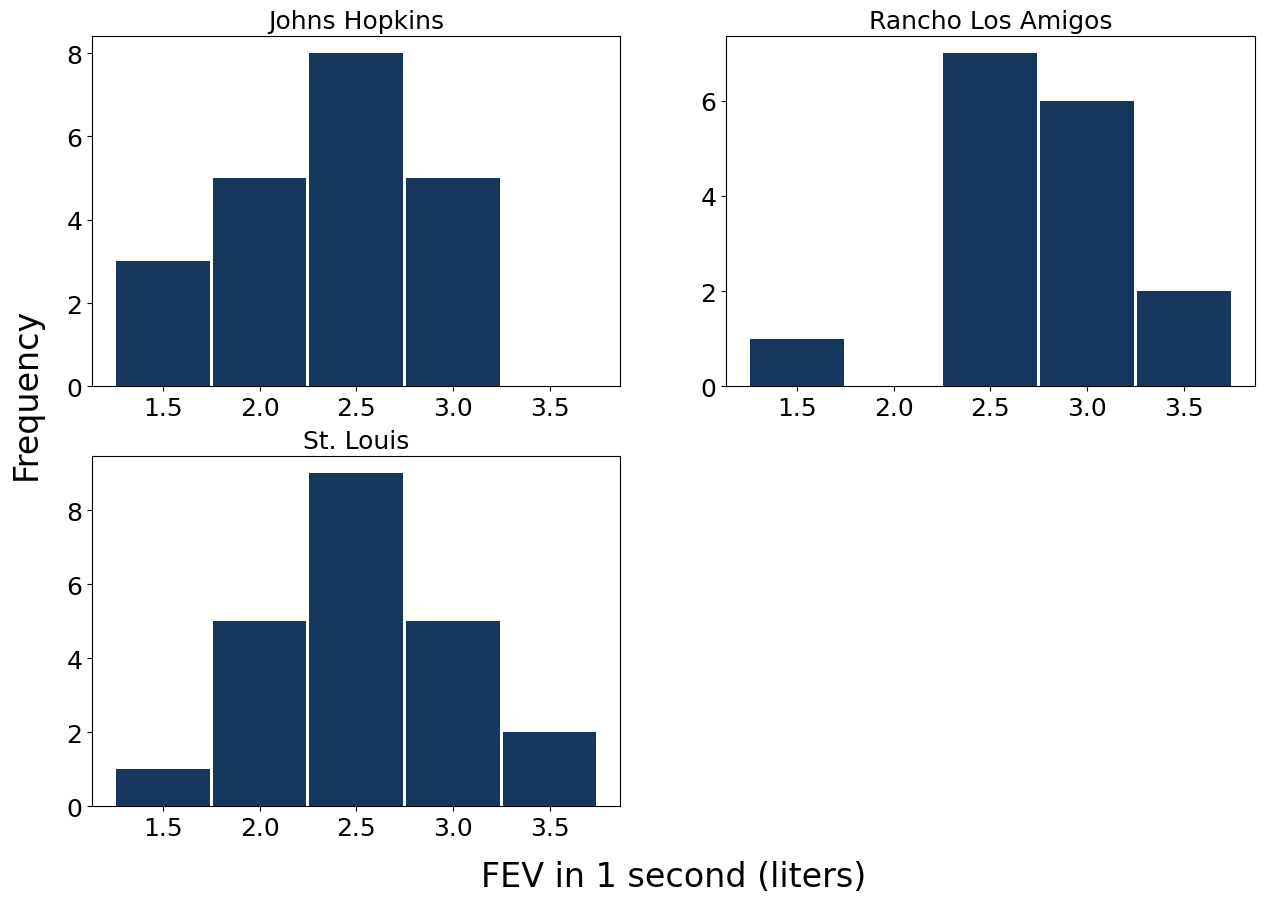

In [13]:
# Example 5A: Plot histograms

import matplotlib.pyplot as plt
import numpy as np

# Set color
color_1 = '#15365d' # Dark blue

# Set bin width
bin_width = 0.485

# Define bins for FEV values
bins = np.arange(1.5, 4.5, 0.5)

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Plot Johns Hopkins data
counts, _ = np.histogram(fev1_dict['Johns Hopkins'], bins=bins)
axs[0, 0].bar(bins[:-1], counts, width=bin_width, color=color_1)
axs[0, 0].set_title('Johns Hopkins',fontsize=18)
axs[0,0].tick_params(axis='x', labelsize=18)
axs[0,0].tick_params(axis='y', labelsize=18)

# Plot Rancho Los Amigos data
counts, _ = np.histogram(fev1_dict['Rancho Los Amigos'], bins=bins)
axs[0, 1].bar(bins[:-1], counts, width=bin_width, color=color_1)
axs[0, 1].set_title('Rancho Los Amigos', fontsize=18)
axs[0,1].tick_params(axis='x', labelsize=18)
axs[0,1].tick_params(axis='y', labelsize=18)

# Plot St. Louis data
counts, _ = np.histogram(fev1_dict['St. Louis'], bins=bins)
axs[1, 0].bar(bins[:-1], counts, width=bin_width, color=color_1)
axs[1, 0].set_title('St. Louis', fontsize=18)
axs[1,0].tick_params(axis='x', labelsize=18)
axs[1,0].tick_params(axis='y', labelsize=18)

# Plot Dummy data
counts=0
axs[1, 1].bar(bins[:-1], counts, width=0.45, color=color_1)
plt.axis('off')

# Plot text
plt.text(-0.10, -0.08, 'FEV in 1 second (liters)', fontsize=24) 
plt.text(-2.5, 0.05, 'Frequency', fontsize=24, rotation=90) 

# Adjust layout
#plt.tight_layout()
plt.show()


If the code is correct, you should see the following table.

![____](https://biologicslab.co/BIO5853/images/module_03/lesson_03_4_image08.png)

### Example 5B: Plot Histograms

Since the Cushing's Syndrome data in the `cushDF` dataframe is significantly different from the `fev1` data, there are a number of changes that must be made in the Python code to create a composition histogram plot. The code in Example 5B, generates four histograms of the data stored in the dictionary `TCort_dict`.

_Code Description:_

The biggest change in the code between Example 5A and 5B has to do with the bin range. The bin range sets the limits of the x-axis. Here is the code that sets the bin range:

~~~text
# Define bins for TCort values
bins = np.arange(1, 60, 2)
~~~
This line of code uses the Numpy function `np.arrange()` to generate a list of values, starting at `1` and ending at `60` with an increment of `2` between values. Here is the content of `bins`:

~~~text
[ 1  3  5  7  9 11 13 15 17 19 21 23 25 27 29 31 33 35 37 39 41 43 45 47 49 51 53 55 57 59]
~~~

Here is the summary statistics for the `TCort_dict` (see **Exercise 3A** above):

~~~text
----Summary Statistics for TCort ---------------------------
                       count   mean  std_dev  min   max
adenoma                  6.0   2.97     0.84  1.9   4.1
bilateral hyperplasia   10.0   8.18     3.59  3.8  15.4
carcinoma                5.0  19.72    17.21  9.2  53.8
unknown                  6.0  14.02     9.22  2.6  30.0
~~~

You should note that the smallest value (`min`) is `1.9` and the largest value (`max`) is `53.8`. When generating the bin range, you need to make sure that it encompasses the minimum and maximum values. Otherwise, values outside of the bin range will not be visible in the plot. However, it is equally important not to make the bin range "wider" than needed, since this will make it harder to see differences in the data. In general, you will need to 'fiddle' with the values to get the best result.

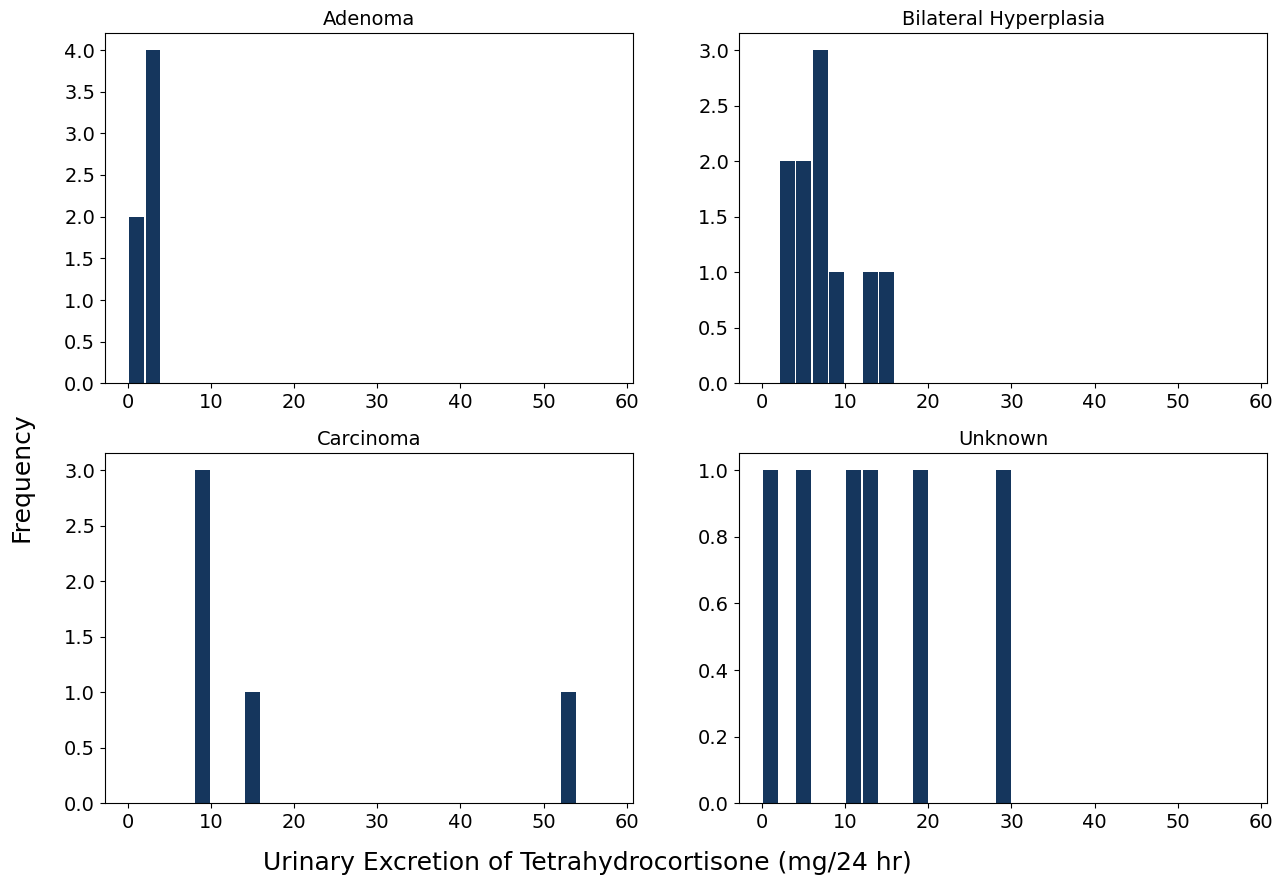

In [14]:
# Example 5B: PLot histograms

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import FuncFormatter

# Set color
color_1 = '#15365d' # Dark blue

# Set bin width
bin_width = 1.80  

# Define bins for TCort values
bins = np.arange(1, 60, 2)

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Plot Type A
counts, _ = np.histogram(TCort_dict['adenoma'], bins=bins)
axs[0,0].bar(bins[:-1], counts, width=bin_width, color=color_1)
axs[0,0].set_title("Adenoma",fontsize=14)
axs[0,0].tick_params(axis='x', labelsize=14)
axs[0,0].tick_params(axis='y', labelsize=14)

# Plot Type b
counts, _ = np.histogram(TCort_dict['bilateral hyperplasia'], bins=bins)
axs[0,1].bar(bins[:-1], counts, width=bin_width, color=color_1)
axs[0,1].set_title("Bilateral Hyperplasia", fontsize=14)
axs[0,1].tick_params(axis='x', labelsize=14)
axs[0,1].tick_params(axis='y', labelsize=14)

# Plot Type c
counts, _ = np.histogram(TCort_dict['carcinoma'], bins=bins)
axs[1,0].bar(bins[:-1], counts, width=bin_width, color=color_1)
axs[1,0].set_title("Carcinoma", fontsize=14)
axs[1,0].tick_params(axis='x', labelsize=14)
axs[1,0].tick_params(axis='y', labelsize=14)

# Plot Type u
counts, _ = np.histogram(TCort_dict['unknown'], bins=bins)
axs[1,1].bar(bins[:-1], counts, width=bin_width, color=color_1)
axs[1,1].set_title("Unknown", fontsize=14)
axs[1,1].tick_params(axis='x', labelsize=14)
axs[1,1].tick_params(axis='y', labelsize=14)

# Plot text
plt.text(-60, -0.2, 'Urinary Excretion of Tetrahydrocortisone (mg/24 hr)', fontsize=18) 
plt.text(-90.5, 0.8, 'Frequency', fontsize=18, rotation=90) 

# Adjust layout
#plt.tight_layout()
plt.show()


If the code is correct, you should see the following set of bar plots.

![____](https://biologicslab.co/BIO5853/images/module_03/lesson_03_4_image13.png)

Recall that the primary reason that we wanted to generate histograms was to get a sense whether the data was "normally distributed". Compared to the histograms generated in Example 5A for the `fev1` data, these histograms are far from being normallly distributed. Part of the reason is the relatively small number of samples being plotted. For example, the plot for `Carcinoma` only has `5` values. Does that mean we can't used this data with ANOVA? Not necessarily, but we will need to proceed carefully!

### **Exericse 5B: Plot Histograms** 

In the cell below, write the Python code to generate 4 histograms showing the urinary excretion rate (mg/24 hr) of Pregnanetriol, using the Python dictionary `NPreg_dict`.

Here are the summary statistics for `NPreg_dict`:
~~~text
----Summary Statistics for NPreg ----------------------------
                       count  mean  std_dev   min   max
adenoma                  6.0  2.44     4.17  0.04  11.7
bilateral hyperplasia   10.0  1.12     0.95  0.20   3.6
carcinoma                5.0  5.50     2.27  2.50   7.9
unknown                  6.0  1.20     1.72  0.10   5.0
~~~

You will need to make a few changes the code shown in Example 5B.

1. Set the bin width to `0.45`
2. Define the bin range as `bins = np.arange(0, 9, 0.5)`
3. Here is the code you should use for plotting the text:

~~~text
# Plot text
plt.text(-6.0, -0.6, 'Urinary Excretion of Pregnanetriol (mg/24 hr)', fontsize=18) 
plt.text(-13.5, 2.8, 'Frequency', fontsize=18, rotation=90) 
~~~

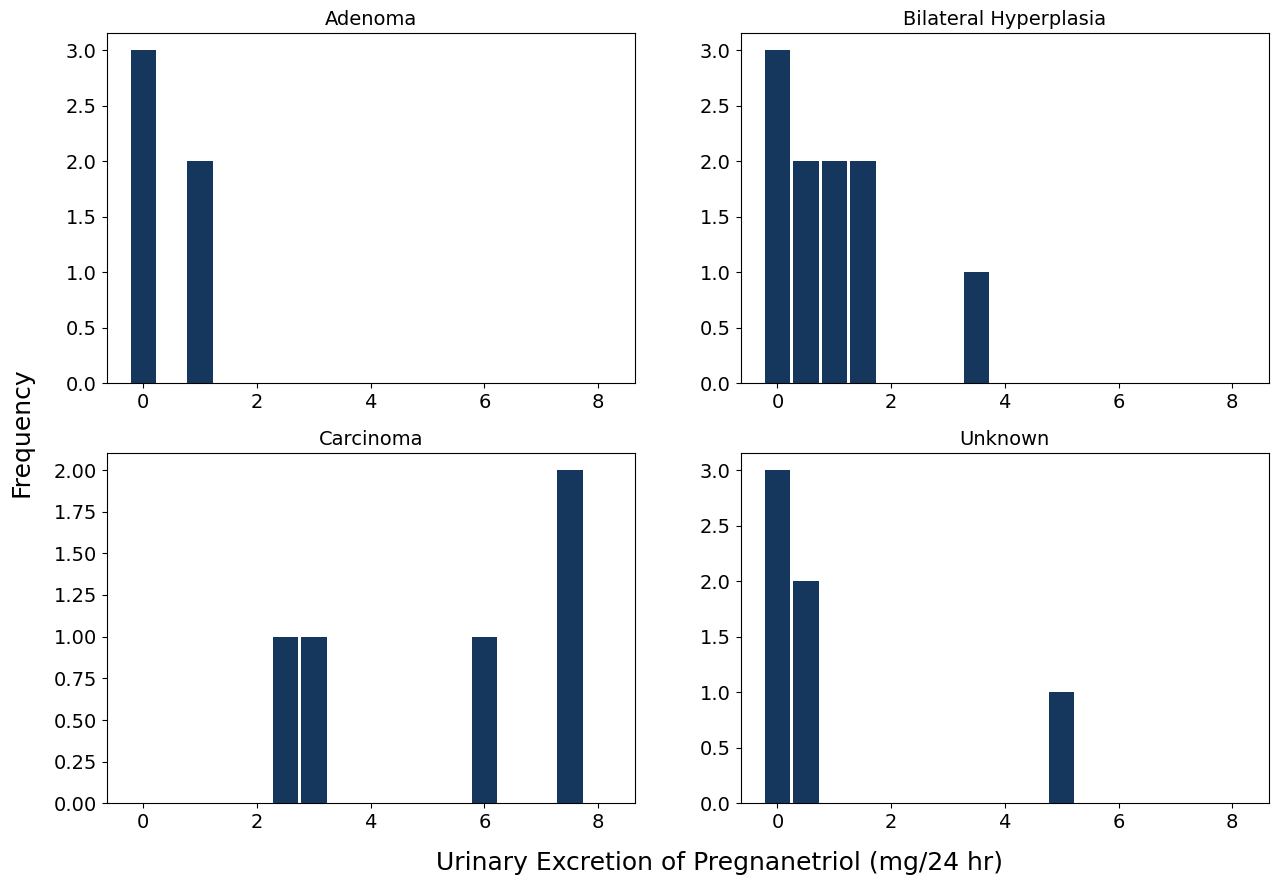

In [15]:
# Example 5B: PLot histograms

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import FuncFormatter

# Set color
color_1 = '#15365d' # Dark blue

# Set bin width
bin_width = 0.45   

# Define bins
bins = np.arange(0, 9, 0.5)

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Plot Type A
counts, _ = np.histogram(PregN_dict['adenoma'], bins=bins)
axs[0,0].bar(bins[:-1], counts, width=bin_width, color=color_1)
axs[0,0].set_title("Adenoma",fontsize=14)
axs[0,0].tick_params(axis='x', labelsize=14)
axs[0,0].tick_params(axis='y', labelsize=14)

# Plot Type b
counts, _ = np.histogram(PregN_dict['bilateral hyperplasia'], bins=bins)
axs[0,1].bar(bins[:-1], counts, width=bin_width, color=color_1)
axs[0,1].set_title("Bilateral Hyperplasia", fontsize=14)
axs[0,1].tick_params(axis='x', labelsize=14)
axs[0,1].tick_params(axis='y', labelsize=14)

# Plot Type c
counts, _ = np.histogram(PregN_dict['carcinoma'], bins=bins)
axs[1,0].bar(bins[:-1], counts, width=bin_width, color=color_1)
axs[1,0].set_title("Carcinoma", fontsize=14)
axs[1,0].tick_params(axis='x', labelsize=14)
axs[1,0].tick_params(axis='y', labelsize=14)

# Plot Type u
counts, _ = np.histogram(PregN_dict['unknown'], bins=bins)
axs[1,1].bar(bins[:-1], counts, width=bin_width, color=color_1)
axs[1,1].set_title("Unknown", fontsize=14)
axs[1,1].tick_params(axis='x', labelsize=14)
axs[1,1].tick_params(axis='y', labelsize=14)

# Plot text
plt.text(-6.0, -0.6, 'Urinary Excretion of Pregnanetriol (mg/24 hr)', fontsize=18) 
plt.text(-13.5, 2.8, 'Frequency', fontsize=18, rotation=90) 

# Adjust layout
#plt.tight_layout()
plt.show()


If the code is correct, you should see the following set of bar plots.

![____](https://biologicslab.co/BIO5853/images/module_03/lesson_03_4_image10.png)

Again, the histograms are not what you would call "normally distributed". However, like the TCort data, the sample size is pretty small. 

### Example 4A: One-Way ANOVA

As you are aware by now, your textbook devotes a lot of pages to going step-by-step through a series of equations to explain how and why a particular statistical test works -- in this chapter ANOVA. For example, on pages 284-285, they show you how the test statistic _F_ is derived for the `fev1` data:

$$ F = \frac{s_B^2}{s_W^2} = \frac{0.769}{0.254} = 3.03. $$

What your textbook doesn't really show you is how to perform ANOVA using your computer. 

The code in the cell below performs a One-Way ANOVA analysis on the same `fev1` dataset used in the example shown on page 285.

_Code Description:_

The first step is to extract the numerical data store in each `key:value` pair in the dictionary `fev1_dict` into separate Numpy arrays. Here is the code that performs this extraction:
~~~text
# Extract the arrays from the dictionary
arrays = [fev1_dict[key] for key in fev1_dict]
~~~

The code then uses the `f_oneway` function in the `scipy.stats` package to perform the ANOVA using this code chunk:

~~~text
# Perform one-way ANOVA
f_statistic, p_value = f_oneway(*arrays)
~~~

The function `f_oneway()` returns two values, the `f-statistic` and the `p-value` which are then printed out.

In [16]:
# Example 4A: One-way anova

import numpy as np
from scipy.stats import f_oneway

# Extract the arrays from the dictionary
arrays = [fev1_dict[key] for key in fev1_dict]

# Perform one-way ANOVA
f_statistic, p_value = f_oneway(*arrays)

# Print the results
print("----ANOVA Results for fev1 data----------")
print(f"F-statistic: {f_statistic:.2f}")
print(f"P-value: {p_value:.4f}")


----ANOVA Results for fev1 data----------
F-statistic: 3.12
P-value: 0.0520


If the code is correct, you should see the following output:

~~~text
----ANOVA Results for fev1 data----------
F-statistic: 3.12
P-value: 0.0520
~~~

The `F-statistic` of `3.12` is very close to the value of `3.03` shown on page 285:

>Therefore, the test statistic is

$$ F = \frac{s_B^2}{s_W^2} = \frac{0.769}{0.254} = 3.03. $$

It's not uncommon for different statistical packages to generate slightly different values so we can ignore the slight difference between `3.12` and `3.03`. Your textbook doesn't give you an exact `_p_ -value` but states:

>For an F distribution with _k_ − 1 = 3 − 1 = 2 and _n − k_ = 60 − 3 = 57 degrees of freedom,  0.05 < p < 0.10. Although we would reject the null hypothesis at the 0.10 level, we do not reject it at the 0.05 level. There may possibly be some difference among the mean $fev_1$ measurements for these three populations, but we are unable to state this with our specified level of significance. 

The _p_ -value returned by our function (`P-value: 0.0520`) is the same. Since it is slightly greater than `0.05` we can't reject it at the `0.05` confidence level. 


### Example 4B: One-Way ANOVA

The code in the cell below shows how to perform a one-way anova on the TCort data stored in the `TCort_dict` dictionary. What we are doing is testing the null hypothesis:

$$ H_0: \mu_1 = \mu_2 = \mu_3 = \mu_4,  $$

Where = $\mu_1$ is the mean urinary excretion of tetrahydrocortisone (mg/24 hr) in `adenoma` tumors, $\mu_2$ is the mean urinary excretion of tetrahydrocortisone (mg/24 hr) from `bilateral hyperplasia` tumors, etc. 

In [17]:
# Example 4B: One-Way ANOVA 

import numpy as np
from scipy.stats import f_oneway

# Extract the arrays from the dictionary
arrays = [TCort_dict[key] for key in TCort_dict]

# Perform one-way ANOVA
f_statistic, p_value = f_oneway(*arrays)

# Print the results
print("----ANOVA Results for TCort data----------")
print(f"F-statistic: {f_statistic:.2f}")
print(f"P-value: {p_value:.4f}")


----ANOVA Results for TCort data----------
F-statistic: 3.23
P-value: 0.0412


If the code is correct, you should see the following output:

~~~text
----ANOVA Results for TCort data----------
F-statistic: 3.23
P-value: 0.0412
~~~

Since the p-value (`0.0412`), we can reject the null hypothesis at the `0.05` level:

$$ H_0: \mu_1 = \mu_2 = \mu_3 = \mu_4, $$

So how should we interpret this result?

_Rejecting_ the null hypothesis simply means that one (or more) of the tumor types execreted more tetrahydrocortisone that the other types. That's it! That's all an ANOVA analysis can tell you. In other words, "one of these is not like the others". 

### **Exercise 4: One-Way ANOVA**

In the cell below write the Python code to perform a one-way anova on the PregN data stored in the `PregN_dict` dictionary to test the null hypothesis:

$$ H_0: \mu_1 = \mu_2 = \mu_3 = \mu_4,  $$

Where = $\mu_1$ is the mean urinary excretion of Pregnanetriol (mg/24 hr) in the four tumor types.

In [18]:
# Insert your code for Exercise 4 here

import numpy as np
from scipy.stats import f_oneway

# Extract the arrays from the dictionary
arrays = [PregN_dict[key] for key in PregN_dict]

# Perform one-way ANOVA
f_statistic, p_value = f_oneway(*arrays)

# Print the results
print("----ANOVA Results for PregN data----------")
print(f"F-statistic: {f_statistic:.2f}")
print(f"P-value: {p_value:.4f}")


----ANOVA Results for PregN data----------
F-statistic: 3.54
P-value: 0.0305


If the code is correct, you should see the following output:

~~~text
----ANOVA Results for PregN data----------
F-statistic: 3.54
P-value: 0.0305
~~~

Based on the ANOVA results, would your Reject, or Fail to Reject the null hypothesis?

![____](https://biologicslab.co/BIO5853/images/module_03/lesson_03_4_image14.png)

![____](https://biologicslab.co/BIO5853/images/module_03/lesson_03_4_image15.png)

## **Multiple Comparisons Procedures**  

As we have seen, one-way analysis of variance may be used to test the null hypothesis that k  population means are identical,  

$$ H_0: \mu_1 = \mu_2 = · · · = \mu_k.  $$

What happens, however, if we reject $H_0$? Although we can conclude that the population means are not all equal, we cannot be more specific than this. We do not know whether all the means are different from one another, or if only some of them are different. Once we reject the null hypothesis, therefore, we often want to conduct additional tests to find out where the differences lie. Many different techniques for  conducting multiple comparisons exist. They typically involve testing each pair of means individually. In the previous section, we mentioned that one possible approach is to perform a series of $\binom{k}{2}$ two-sample t-tests. As noted, however, performing multiple tests increases the probability of committing a type I error. We can avoid this problem by being more  conservative in our individual comparisons; by reducing the individual α levels, we ensure that the  overall level of significance is kept at a predetermined level. The significance level for each of the individual comparisons depends on the number of tests being conducted. The greater the number of tests, the smaller it must be. To set the overall probability  of committing a type I error at 0.05, for example, we should use  

$$ \alpha^* = \frac{0.05}{\left(\frac{k}{2}\right)} $$  

Pagano, Marcello; Gauvreau, Kimberlee; Mattie, Heather. Principles of Biostatistics (p. 286). CRC Press. Kindle Edition. 


#### **Install `statsmodel`**

Just in case the Python packagage `statsmodel` is not in your current environment, run the next code cell to install it. 

In [19]:
!pip install statsmodels

The output will either show that you are installing the package, or if the package is already installed, it will say that. 

### **Bonferroni Correction**

The **_Bonferroni correction_** is a statistical method used to address the problem of multiple comparisons. When you perform multiple hypothesis tests, the chance of making a Type I error (false positive) increases. The Bonferroni correction helps control this by adjusting the significance level for each individual test.

#### **How It Works**
* **Significance Level Adjustment:** If you have an overall significance level (alpha) of 0.05 and you are conducting ( n ) tests, the Bonferroni correction sets the significance level for each individual test to ( \alpha / n ). For example, if you are conducting 5 tests, each test would have a significance level of ( 0.05 / 5 = 0.01 )12.
* **P-Value Adjustment:** Alternatively, you can adjust the p-values instead of the significance level. Multiply each p-value by the number of tests. If the adjusted p-value is less than or equal to the original significance level, the result is considered statistically significant12.

#### **Example**
Suppose you are testing 10 hypotheses with an overall alpha of 0.05. Using the Bonferroni correction, each test would have an adjusted alpha of ( 0.05 / 10 = 0.005 ). This means a result would need to have a p-value less than 0.005 to be considered significant.

#### **Applications**
The Bonferroni correction is commonly used in:

* **Clinical Trials:** To control for multiple endpoints.
* **Genetic Studies:** When testing associations between many genetic markers and a trait.
* **Psychological Research:** When comparing multiple groups or conditions.

Run the next code cell to see how the Bonferroni correction changes ("corrects") _p_ -values when you run multiple comparison procedures on the same data.

In [20]:
# Example of Bonferroni correction

import numpy as np
from statsmodels.stats.multitest import multipletests

# Example p-values from multiple hypothesis tests
p_values = np.array([0.01, 0.04, 0.03, 0.002, 0.05])

# Apply Bonferroni correction
alpha = 0.05  # significance level
corrected_p_values = multipletests(p_values, alpha=alpha, method='bonferroni')

# Extract the adjusted p-values and the reject decision
adjusted_p_values = corrected_p_values[1]
reject_decision = corrected_p_values[0]

print("----Examples of Bonferroni Corrections----------")
print("Original p-values:", p_values)
print("Adjusted p-values:", adjusted_p_values)
print("Reject null hypothesis:", reject_decision)


----Examples of Bonferroni Corrections----------
Original p-values: [0.01  0.04  0.03  0.002 0.05 ]
Adjusted p-values: [0.05 0.2  0.15 0.01 0.25]
Reject null hypothesis: [ True False False  True False]


If the code if correct, you should see the following output:
~~~text
----Examples of Bonferroni Corrections----------
Original p-values: [0.01  0.04  0.03  0.002 0.05 ]
Adjusted p-values: [0.05 0.2  0.15 0.01 0.25]
Reject null hypothesis: [ True False False  True False]
~~~

![____](https://biologicslab.co/BIO5853/images/module_03/lesson_03_4_image16.png)

## **Further Applications**



You were shown in Example 4A, Example 4B, and **Exercise 4**, how to use your computer to perform an ANOVA analysis of numerical data stored in a Python dictionary. While these examples are useful, much more useful is to see how to perform ANOVA on data that is stored in DataFrame, which is the most common method of storing data in biological and/or medical datasets.

### **The `Genotype` dataset**

For the last part of this lesson, we will be using the data in the `genotype` dataset that you were asked to download and create a new DataFrame called `genoDF` in **Exercise 1B**.

The genotype dataset in the MASS package is a well-known dataset used in statistical analysis and educational purposes. It contains data on the weights of mice from different genotypes. Here’s a brief overview of what it includes and its significance:

#### **Overview of the genotype Dataset**

* **Source:** The dataset is part of the MASS package in R, which is a collection of functions and datasets to support the book _Modern Applied Statistics with S_ by W.N. Venables and B.D. Ripley.
* **Variables:**
- **Litter:** Identifier for the litter (group of mice born at the same time).
- **Mother:** Identifier for the mother of the litter.
- **Wt:** The weight gain of the rat litter after 28 days.
- **Sex:** Sex of the mice (Male or Female).
- **Genotype:** Genotype of the mice (e.g., AA, AB, BB).

#### **Significance**

The genotype dataset is often used to demonstrate various statistical techniques, such as ANOVA (Analysis of Variance) to compare the weights of mice across different genotypes.


### Example 5: Perform ANOVA on Data in a DataFrame

The cell below shows the Python code to perform an ANOVA on the `genotype` data in the DataFrame `genoDF`. In this example, we are using the variable `Mother` as the **_independent variable_** and weight gain of the litter `Wt` as the dependent variable. The null hypothesis is that the average weight gain of the 4 litters after 28 days did _not_ vary significantly depending upon the `Mother`. 

_Code Description:_

Here is the code chunk that performs the ANOVA:

`model = ols('Wt ~ Mother', data=genoDF).fit()`

This line of code performs an Ordinary Least Squares (OLS) regression using the statsmodels library in Python. Here’s a breakdown of what each part does:

1. `ols('Wt ~ Mother', data=genoDF)`:
- - `ols:` This function from statsmodels.formula.api specifies an OLS regression model.
- - `'Wt ~ Mother':` This is the formula for the regression model. It indicates that Wt (weight) is the dependent variable and Mother is the independent variable. The tilde (~) separates the dependent variable from the independent variable(s).
-- `data=genoDF:` This specifies that the data for the regression model is in the DataFrame genoDF.
2. `.fit():`
This method fits the OLS regression model to the data. It estimates the coefficients of the regression model.

The next line of code:

`anova_table = sm.stats.anova_lm(model, typ=2)`

performs the actual Analysis of Variance (ANOVA) on the fitted linear model `model` using the statsmodels library. 

Here’s a detailed breakdown:

1. `sm.stats.anova_lm(model, typ=2)`:
- - `sm.stats.anova_lm:` This function from the statsmodels library generates an ANOVA table for one or more fitted linear models.
- - `model:` This is the fitted linear model object created earlier using the ols function and the .fit() method.
- - `typ=2:` This specifies the type of ANOVA to perform. Type II ANOVA is used when you want to test each main effect after accounting for all other main effects, but without considering interactions12.
2. `anova_table:`
- This variable stores the resulting ANOVA table, which includes important statistics such as:
- * **Sum of Squares (sum_sq):** Measures the variability explained by each factor.
- * **Degrees of Freedom (df):** The number of independent values or quantities which can be assigned to a statistical distribution.
- * **F-Statistic (F):** The ratio of the variance explained by the model to the variance within the groups.
- * **P-Value (PR(>F)):** Indicates the probability that the observed data would occur if the null hypothesis were true.

At the bottom of the cell is several lines of code used to create a Python list called `grouped_data` which is used for **_Bartlett's test_**. 
Bartlett’s test is a statistical test used to determine whether multiple samples have equal variances. This is important because many statistical tests, like ANOVA (Analysis of Variance), assume that the variances across groups are equal. Bartlett’s test helps verify this assumption.

Here’s a brief overview of how Bartlett’s test works:

1. **Hypotheses:**
- **Null Hypothesis ($H_0$):** All groups have equal variances.
- **Alternative Hypothesis ($H_A$):** At least one group has a different variance.
2. **Test Statistic:**
- The test statistic for Bartlett’s test follows a chi-square distribution. It is calculated based on the variances of the groups and the number of observations in each group.
3. **Sensitivity:**
Bartlett’s test is sensitive to departures from normality. If the data is not normally distributed, the test may incorrectly indicate unequal variances. In such cases, alternatives like Levene’s test or the Brown-Forsythe test, which are less sensitive to non-normality, might be more appropriate.

In [51]:
# Example 5: Perform ANOVA on DataFrame

import pandas as pd
import numpy as np
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Define variables
independent_var = 'Mother'
dependent_var = 'Wt'

# Print header
print("----ANOVA Results for Genotype data----------")

# Summary statistics
summary = genoDF.groupby(independent_var)[dependent_var].agg(['mean', 'std', 'count'])
print(summary)

# ANOVA
model = ols(f'({dependent_var} ~ {independent_var})', data=genoDF).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

# Generate grouped data for Bartlett's test
# Initialize an empty list to store the grouped data
grouped_data = []

# Get the unique groups from the independent variable
unique_groups = genoDF[independent_var].unique()

# Loop through each unique group
for group in unique_groups:
    # Filter the DataFrame for the current group
    group_data = genoDF[dependent_var][genoDF[independent_var] == group]
    
    # Append the filtered data to the grouped_data list
    grouped_data.append(group_data)

# Check for missing values
if genoDF['Wt'].isnull().any():
    print(f"Warning: Missing values detected in {dependent_var} column. Please handle them before proceeding.")
else:
    # Bartlett's test for equal variances
    bartlett_test = stats.bartlett(*grouped_data)
    print(f"Bartlett's test: chi2 = {bartlett_test.statistic:.4f}, p-value = {bartlett_test.pvalue:.4f}")


----ANOVA Results for Genotype data----------
           mean       std  count
Mother                          
A       55.4000  9.889186     16
B       58.7000  7.242078     14
I       53.3625  6.452790     16
J       48.6800  6.297301     15
               sum_sq    df         F    PR(>F)
Mother     771.605385   3.0  4.404509  0.007433
Residual  3328.521500  57.0       NaN       NaN
Bartlett's test: chi2 = 4.0342, p-value = 0.2578


If the code is correct, you should see the following output:

~~~text
----ANOVA Results for Genotype data  -------------
           mean       std  count
Mother                          
A       55.4000  9.889186     16
B       58.7000  7.242078     14
I       53.3625  6.452790     16
J       48.6800  6.297301     15
               sum_sq    df         F    PR(>F)
Mother     771.605385   3.0  4.404509  0.007433
Residual  3328.521500  57.0       NaN       NaN
Bartlett's test: chi2 = 4.0342, p-value = 0.2578
~~~

As usual, we look to see if any _p_ -values are less than `0.05`. For the ANOVA test, the _p_ -value for `Mother` is `0.007433` which is definitely smaller than our `0.05` level. This means there is a **_statistically significant_** interaction between our independent variable (`Mother`) and the dependent variable (`Wt`). In other words we can **_reject_** the null hypothesis ($H_0$) that average weight gain for each litter did _not_ depend upon the mother ('A', 'B', 'I', and 'J'). Therefore we have to accept the alternative hypothesis ($H_A$) that weight was different for different rat mothers.

You should also note that the `Bartlett's test: p-value = 0.2578` is **_greater_** that `0.05`. This means we can't reject the null hypothesis that the `genome` data were not normally distributed. In other words, there is no evidence that the data was significantly skewed so application of ANOVA is appropiate for this dataset.  

### **Exercise 5: Perform ANOVA on Data in a DataFrame** 

In the cell below, write the Python code to perform an ANOVA on the `genotype` data in the DataFrame `genoDF` with the independent variable `Litter` and the dependent variable `Wt`. 

_Hint:_ You only need to change the name for `independent_var`. 

In [54]:
# Insert your code for Exercise 5 here

import pandas as pd
import numpy as np
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Define variables
independent_var = 'Litter'
dependent_var = 'Wt'

# Print header
print("----ANOVA Results for Genotype data----------")

# Summary statistics
summary = genoDF.groupby(independent_var)[dependent_var].agg(['mean', 'std', 'count'])
print(summary)

# ANOVA
model = ols(f'({dependent_var} ~ {independent_var})', data=genoDF).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

# Generate grouped data for Bartlett's test
# Initialize an empty list to store the grouped data
grouped_data = []

# Get the unique groups from the independent variable
unique_groups = genoDF[independent_var].unique()

# Loop through each unique group
for group in unique_groups:
    # Filter the DataFrame for the current group
    group_data = genoDF[dependent_var][genoDF[independent_var] == group]
    
    # Append the filtered data to the grouped_data list
    grouped_data.append(group_data)

# Check for missing values
if genoDF['Wt'].isnull().any():
    print(f"Warning: Missing values detected in {dependent_var} column. Please handle them before proceeding.")
else:
    # Bartlett's test for equal variances
    bartlett_test = stats.bartlett(*grouped_data)
    print(f"Bartlett's test: chi2 = {bartlett_test.statistic:.4f}, p-value = {bartlett_test.pvalue:.4f}")


----ANOVA Results for Genotype data----------
             mean        std  count
Litter                             
A       55.111765   8.634370     17
B       54.666667   7.133689     15
I       52.907143  11.273349     14
J       52.973333   5.870808     15
               sum_sq    df        F    PR(>F)
Litter      60.157286   3.0  0.28292  0.837515
Residual  4039.969599  57.0      NaN       NaN
Bartlett's test: chi2 = 6.1503, p-value = 0.1045


If the code is correct, you should see the following output:

~~~text
----ANOVA Results for Genotype data----------
             mean        std  count
Litter                             
A       55.111765   8.634370     17
B       54.666667   7.133689     15
I       52.907143  11.273349     14
J       52.973333   5.870808     15
               sum_sq    df        F    PR(>F)
Litter      60.157286   3.0  0.28292  0.837515
Residual  4039.969599  57.0      NaN       NaN
Bartlett's test: chi2 = 6.1503, p-value = 0.1045
~~~

Now we don't see any _p_ -values that are less than `0.05`. For the ANOVA test, the _p_ -value for `Litter` is `0.837515` which is definitely larger than our `0.05` level. This means there is no **_statistically significant_** interaction between our independent variable (`Litter`) and the dependent variable (`Wt`). A non-significant ANOVA result suggests that any observed differences in weight gain among the different litter genotypes are likely due to random variation rather than a true effect of the litter genotype.

Again. Bartlett's test returned a _p_ -value (`0.`1045`) that is greated than the `0.05` level suggesting that the data was approximately normally distributed.

## **Lesson Turn-in**

When you have completed and run all of the code cells, create a PDF of your notebook and upload the **_PDF_** to your Lesson_03_4 assignment in Canvas for grading.
